install wordcloud using pip, not conda

In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS, get_single_color_func
%matplotlib inline

did a search on PubMed for the lab's papers, grabbed the PMIDs, imported the refs into a new library in Zotero, and exported the pubs as a CSV

In [2]:
%cd /home/mark/Desktop
Pubs = pd.read_csv('Laubach Lab.csv')

/home/mark/Desktop


In [3]:
Pubs.keys()

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Publication Title', 'ISBN', 'ISSN', 'DOI', 'Url', 'Abstract Note',
       'Date', 'Date Added', 'Date Modified', 'Access Date', 'Pages',
       'Num Pages', 'Issue', 'Volume', 'Number Of Volumes',
       'Journal Abbreviation', 'Short Title', 'Series', 'Series Number',
       'Series Text', 'Series Title', 'Publisher', 'Place', 'Language',
       'Rights', 'Type', 'Archive', 'Archive Location', 'Library Catalog',
       'Call Number', 'Extra', 'Notes', 'File Attachments', 'Link Attachments',
       'Manual Tags', 'Automatic Tags', 'Editor', 'Series Editor',
       'Translator', 'Contributor', 'Attorney Agent', 'Book Author',
       'Cast Member', 'Commenter', 'Composer', 'Cosponsor', 'Counsel',
       'Interviewer', 'Producer', 'Recipient', 'Reviewed Author',
       'Scriptwriter', 'Words By', 'Guest', 'Number', 'Edition',
       'Running Time', 'Scale', 'Medium', 'Artwork Size', 'Filing Date',
       'Applicatio

In [4]:
Tags = pd.read_csv('Laubach Lab.csv', usecols=['Automatic Tags'])

In [5]:
Tags.keys()

Index(['Automatic Tags'], dtype='object')

concatenate the terms, with spaces between them, and convert to lower case

In [6]:
Tags = Tags['Automatic Tags'].str.cat(sep=' ').lower()

drop come irrelevant terms and symbols

In [7]:
Tags = Tags.replace(',',' ').replace(';',' ').replace('-',' ').replace('(psychology)',' ')
Tags = Tags.replace('term',' ').replace('animal',' ').replace('male',' ').replace('fe',' ')
Tags = Tags.replace('long',' ').replace('evans',' ')

In [8]:
%whos str

Variable   Type    Data/Info
----------------------------
Tags       str     adaptation  physiological<...>rose  theta  theta rhythm


In [ ]:
?WordCloud

useful code from Stackoverflow for cutting off the bright colors in a matplotlib colormap, and my total hack for using it to give nice colors back from the "classy" cividis colormap (new in latest matplotlib release)

In [9]:
# https://stackoverflow.com/questions/24746231/matplotlib-half-color-axis

from matplotlib.colors import LinearSegmentedColormap

cmap = plt.get_cmap('cividis')
colors = cmap(np.linspace(0, 0.75, cmap.N // 4)) 

cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)

changed to a readable Google font and set the figure size to 1920 and 600 which seems good for clouds that might end up in papers or as cover art

from the docstring:
relative_scaling : float (default=.5)
    Importance of relative word frequencies for font-size.  With
    relative_scaling=0, only word-ranks are considered.  With
    relative_scaling=1, a word that is twice as frequent will have twice
    the size.  If you want to consider the word frequencies and not only
    their rank, relative_scaling around .5 often looks good.

collocations = False breaks up paired terms like "medial prefrontal" and "prefrontal cortex"

In [12]:
wc = WordCloud(width=1920,height=600, relative_scaling=0.5, collocations=False,
               max_words=50, background_color="white", colormap=cmap2,
               font_path='/usr/share/fonts/truetype/noto/NotoSansUI-Regular.ttf').generate(Tags)

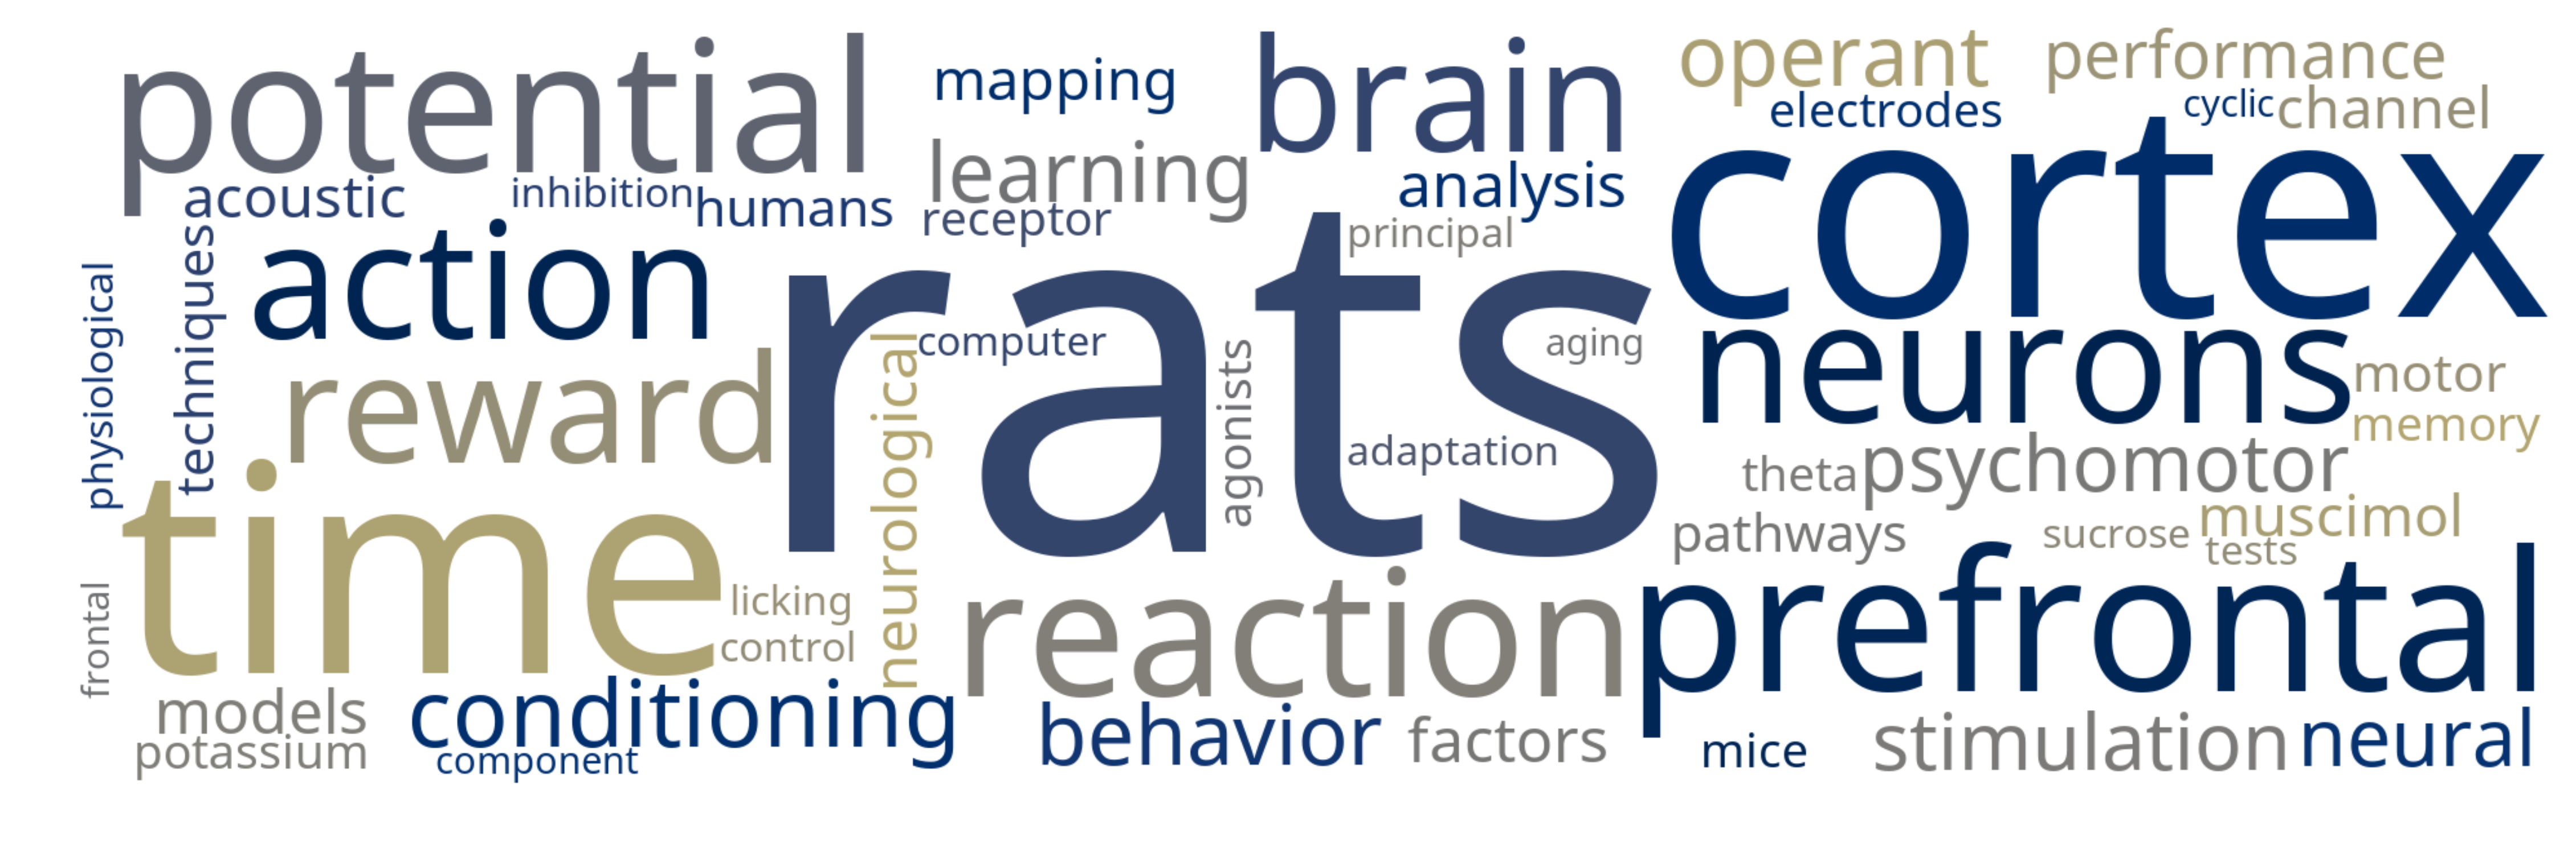

In [13]:
plt.figure(1, figsize=(19.2, 6.0), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_ML_pubs.png')
None

made the mask based on an image of a mouse and converted into black and white using GIMP

In [14]:
# use masking image
mask = np.array(Image.open("mouse_mask_huge.png"))

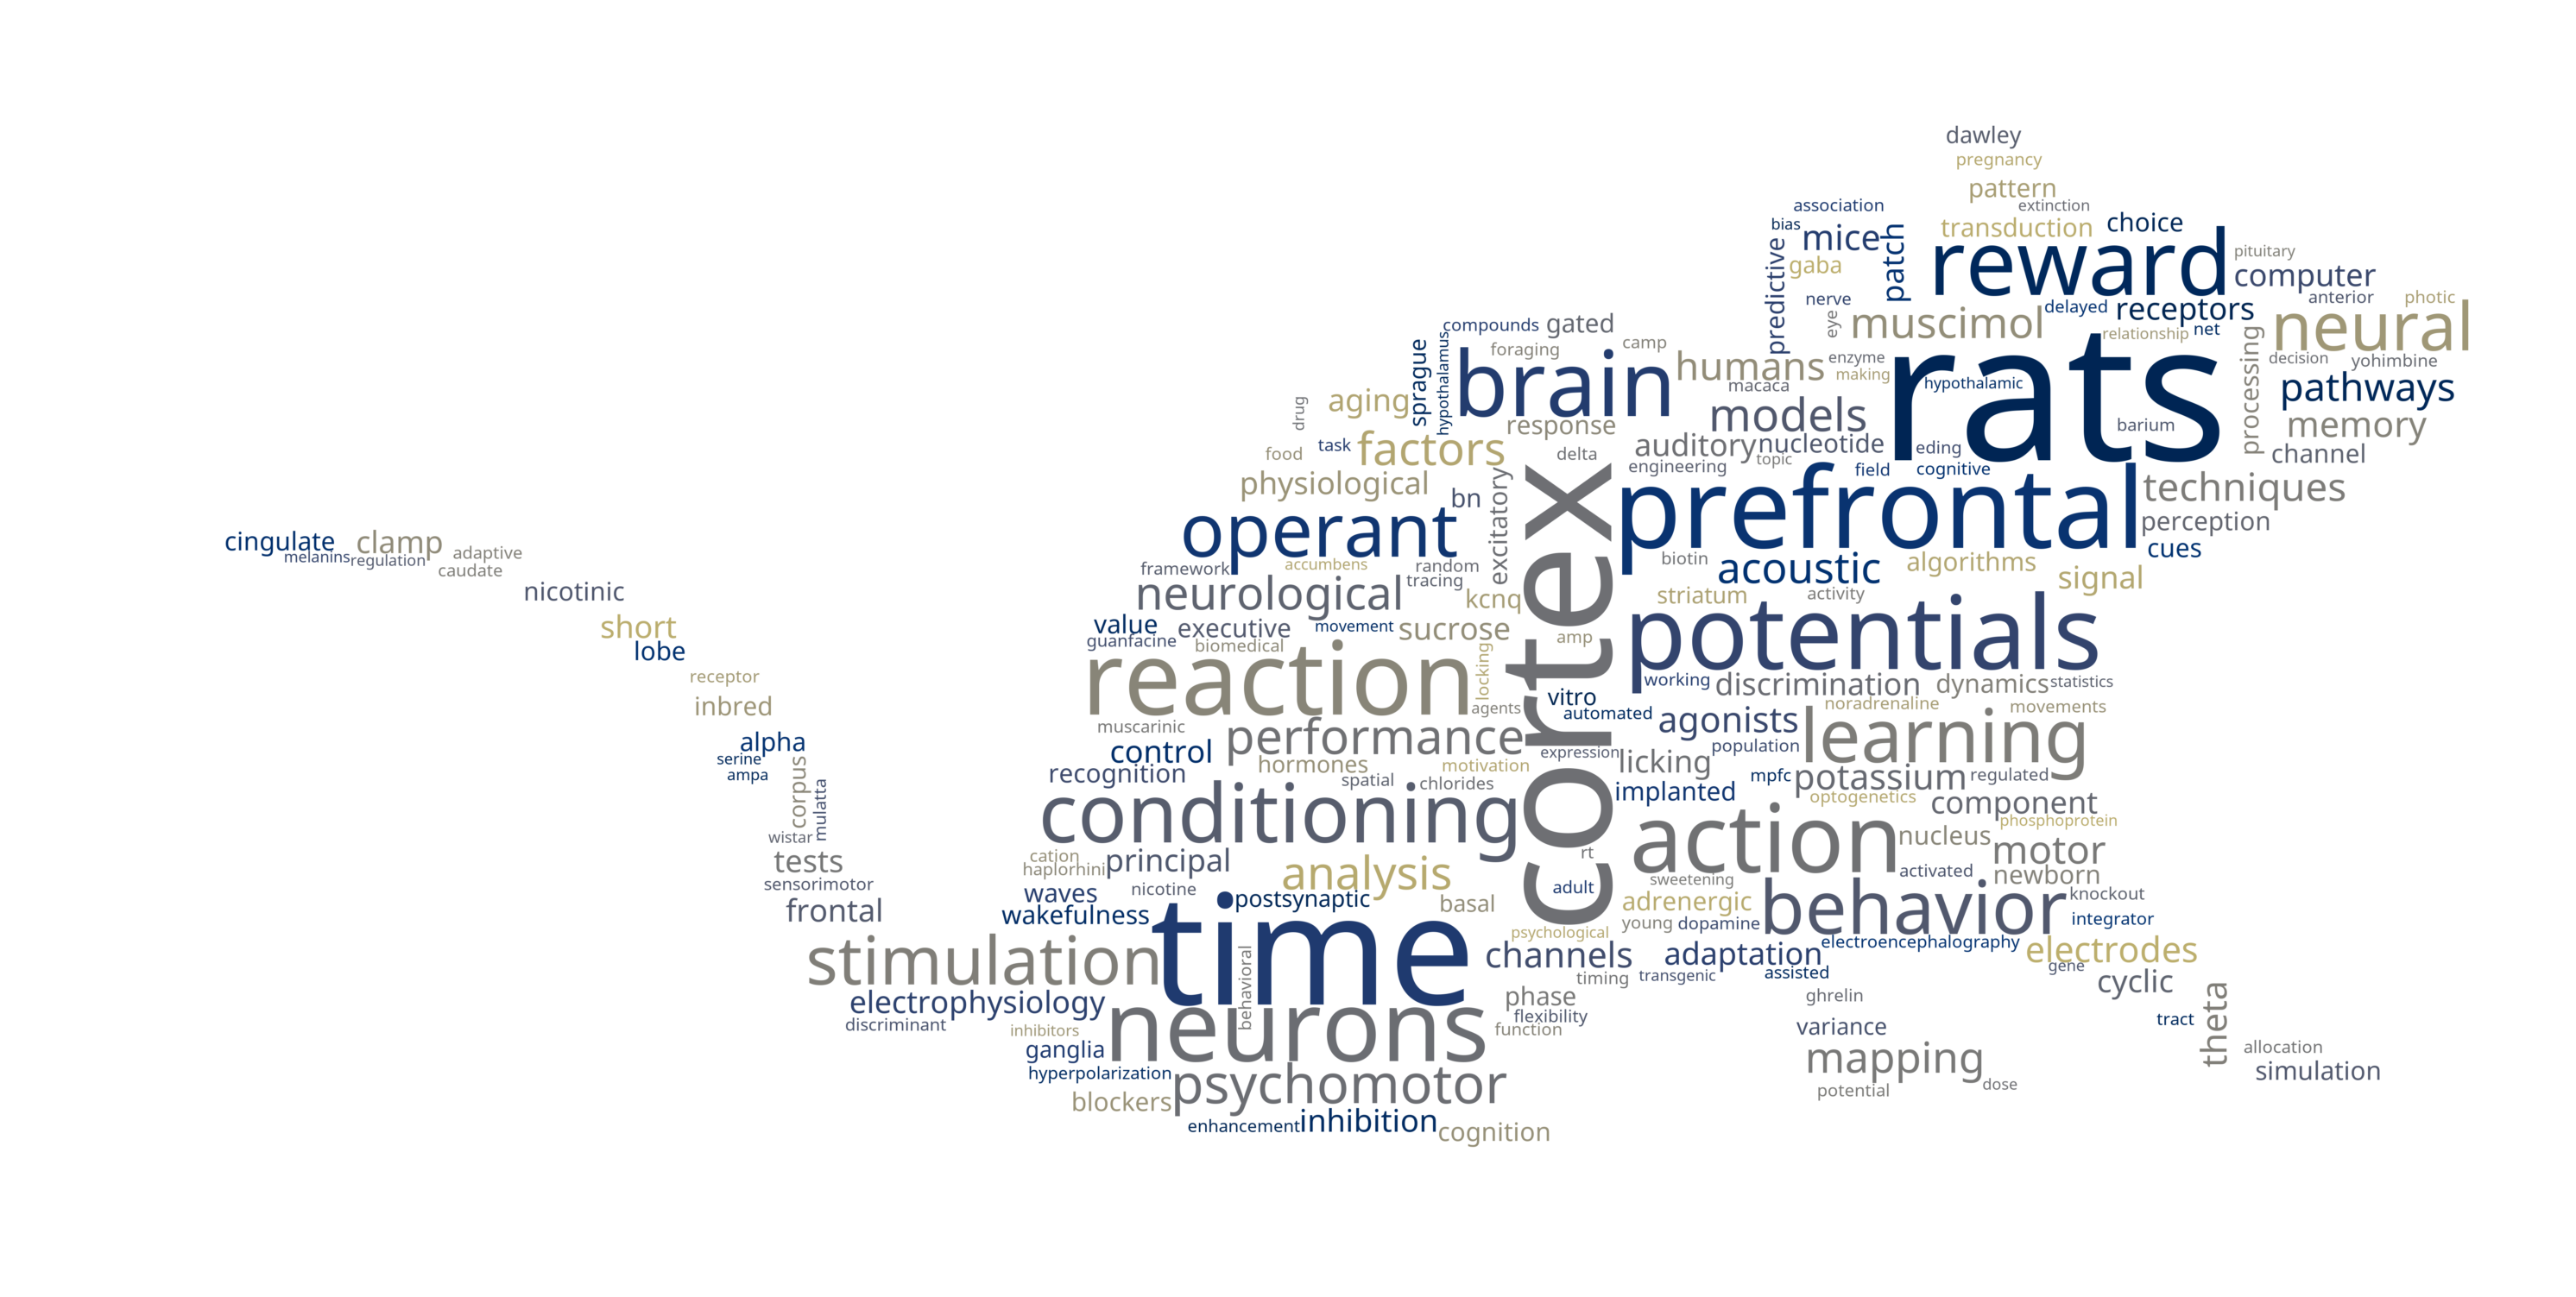

In [15]:
# word cloud plotted over mask
wc_mask = WordCloud(width=1920,height=600, relative_scaling=0.5, normalize_plurals=False, collocations=False,
                    background_color="white", font_path='/usr/share/fonts/truetype/noto/NotoSansUI-Regular.ttf',
                    max_words=200, colormap=cmap2, mask=mask).generate(Tags)

plt.figure(1, figsize=(19.2, 6.0), dpi=300)
plt.imshow(wc_mask, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_ML_pubs_mask.png')
None